# Marketing A/B Testing Analysis

Simple marketing campaign with experiment and control group for A/B testing

Marketing companies want to run successful campaigns, but the market is complex and several options can work. So normally they tun A/B tests, that is a randomized experimentation process wherein two or more versions of a variable (web page, page element, banner, etc.) are shown to different segments of people at the same time to determine which version leaves the maximum impact and drive business metrics.

The companies are interested in answering two questions:

**Would the campaign be successful?**

**If the campaign was successful, how much of that success could be attributed to the ads?**

With the second question in mind, we normally do an A/B test.

# Marketing Campaign Dataset

The dataset is to analyze the groups, find if the ads were successful, how much the company can make from the ads, and if the difference between the groups is statistically significant.

Dataset Include:
- Index: Row index
- user id: User ID (unique)
- test group: If "ad" the person saw the advertisement, if "psa" they only saw the public service announcement
- converted: If a person bought the product then True, else is False
- total ads: Amount of ads seen by person
- most ads day: Day that the person saw the biggest amount of ads
- most ads hour: Hour of day that the person saw the biggest amount of ads

In [6]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Read the Dataset
df = pd.read_csv('marketing_AB.csv')

In [76]:
df.head()

,test group,converted,total ads,most ads day,most ads hour
0,ad,False,130,Monday,20
1,ad,False,93,Tuesday,22
2,ad,False,21,Tuesday,18
3,ad,False,355,Tuesday,10
4,ad,False,276,Friday,14


In [10]:
# Check if we've duplicates with respect to user id
df.duplicated(subset = 'user id').sum()

0

In [13]:
# Drop unwanted columns
df.drop(['Unnamed: 0','user id'], axis= 1, inplace=True)

In [16]:
df.columns

Index(['test group', 'converted', 'total ads', 'most ads day',
       'most ads hour'],
      dtype='object')

In [22]:
# Check if the Categorical variables have appropriate number of levels
df_cat= df[['test group','converted','most ads day','most ads hour']]
df_cat.nunique()

test group        2
converted         2
most ads day      7
most ads hour    24
dtype: int64

In [23]:
# Check if Categorical variables have appropriate levels
for i in df_cat.columns:
    print(i.upper(), ":", df_cat[i].unique())

TEST GROUP : ['ad' 'psa']
CONVERTED : [False  True]
MOST ADS DAY : ['Monday' 'Tuesday' 'Friday' 'Saturday' 'Wednesday' 'Sunday' 'Thursday']
MOST ADS HOUR : [20 22 18 10 14 13 19 11 12 16 21  3 23  4  8  0  2 15  1  6 17  7  9  5]


# Univariate Analysis

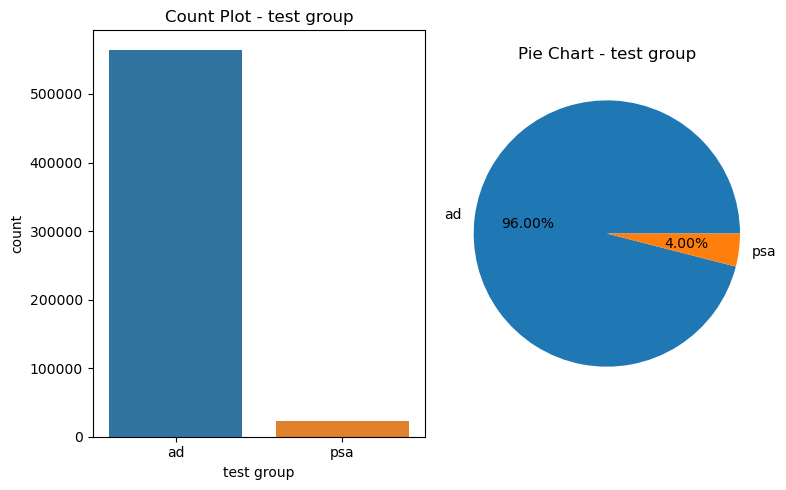

In [41]:
variable = 'test group'

plt.figure(figsize = (8, 5))

# Count Plot
plt.subplot(1, 2, 1)
sns.countplot(x=variable, data=df_cat)
plt.title(f'Count Plot - {variable}')

# Pie Chart
plt.subplot(1, 2, 2)
counts = df_cat[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct='%0.2f%%')
plt.title(f'Pie Chart - {variable}')

# Adjust Layout
plt.tight_layout()

# Show Plot
plt.show()

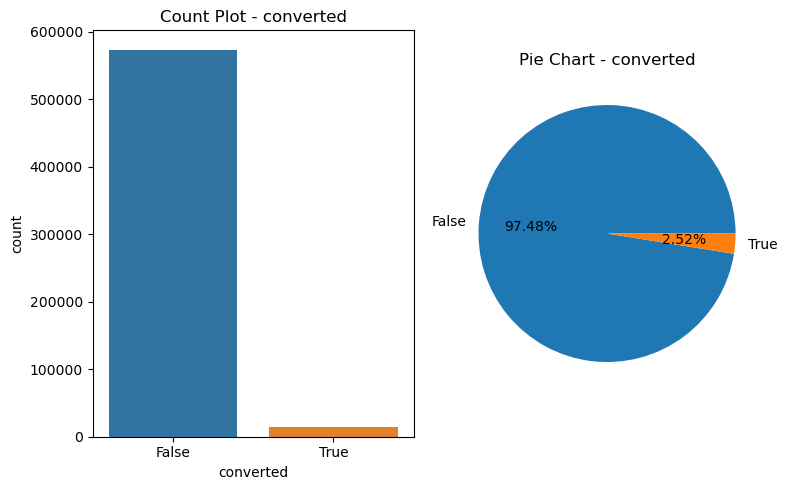

In [42]:
variable = 'converted'

plt.figure(figsize = (8, 5))

# Count Plot
plt.subplot(1, 2, 1)
sns.countplot(x=variable, data=df_cat)
plt.title(f'Count Plot - {variable}')

# Pie Chart
plt.subplot(1, 2, 2)
counts = df_cat[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct='%0.2f%%')
plt.title(f'Pie Chart - {variable}')

# Adjust Layout
plt.tight_layout()

# Show Plot
plt.show()

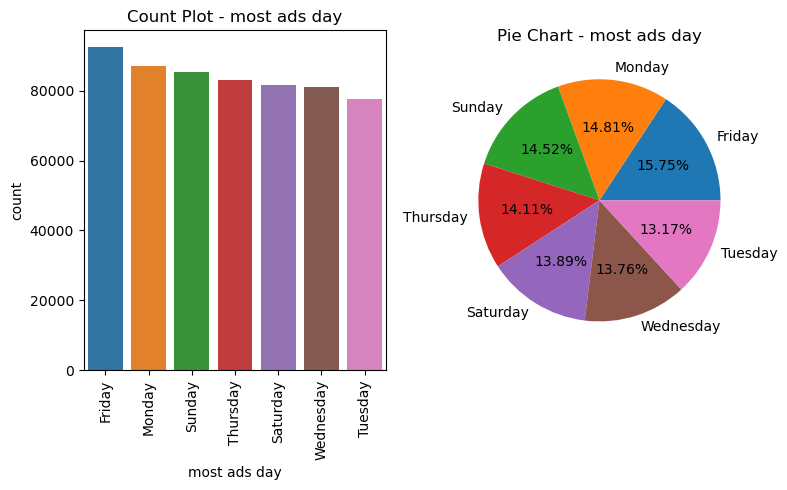

In [43]:
variable = 'most ads day'

plt.figure(figsize = (8, 5))

# Count Plot
plt.subplot(1, 2, 1)
sns.countplot(x =variable, data =df_cat, order =df_cat['most ads day'].value_counts().index )
plt.title(f'Count Plot - {variable}')
plt.xticks(rotation = 90)

# Pie Chart
plt.subplot(1, 2, 2)
counts = df_cat[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct='%0.2f%%')
plt.title(f'Pie Chart - {variable}')

# Adjust Layout
plt.tight_layout()

# Show Plot
plt.show()

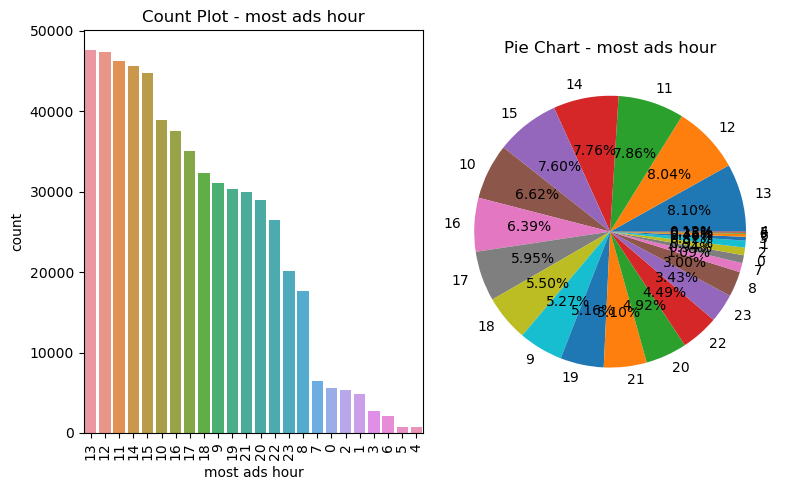

In [44]:
variable = 'most ads hour'

plt.figure(figsize = (8, 5))

# Count Plot
plt.subplot(1, 2, 1)
sns.countplot(x =variable, data =df_cat, order =df_cat['most ads hour'].value_counts().index )
plt.title(f'Count Plot - {variable}')
plt.xticks(rotation = 90)

# Pie Chart
plt.subplot(1, 2, 2)
counts = df_cat[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct='%0.2f%%')
plt.title(f'Pie Chart - {variable}')

# Adjust Layout
plt.tight_layout()

# Show Plot
plt.show()

C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


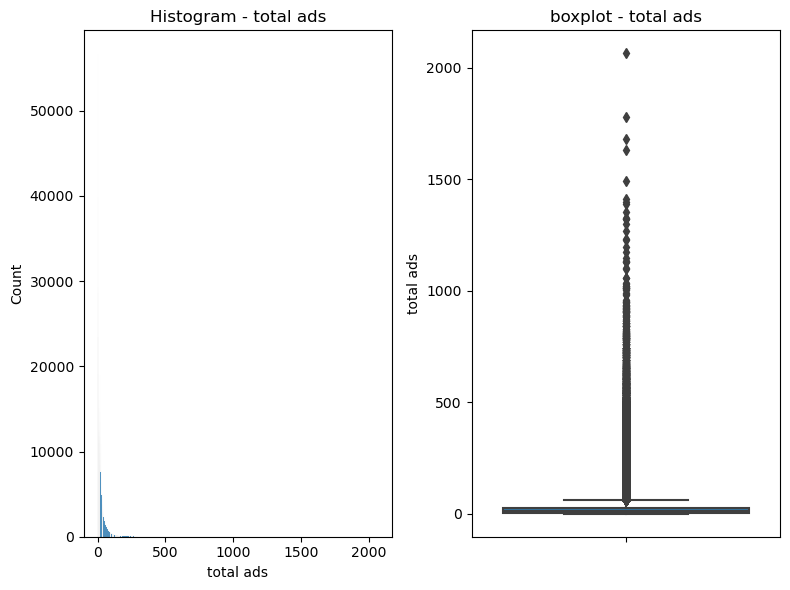

In [46]:
variable = 'total ads'

plt.figure(figsize = (8, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(x=variable, data=df)
plt.title(f'Histogram - {variable}')

# Pie Chart
plt.subplot(1, 2, 2)
sns.boxplot(y=variable, data=df)
plt.title(f'boxplot - {variable}')

# Adjust Layout
plt.tight_layout()

# Show Plots
plt.show()

In [47]:
# Let's check the descriptive stats of this feature
df['total ads'].describe()

count    588101.000000
mean         24.820876
std          43.715181
min           1.000000
25%           4.000000
50%          13.000000
75%          27.000000
max        2065.000000
Name: total ads, dtype: float64

C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


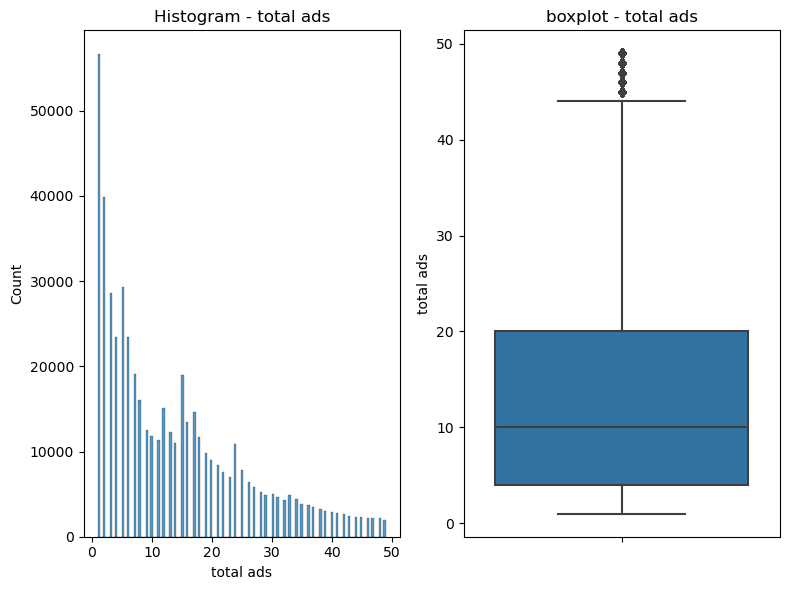

In [48]:
variable = 'total ads'

plt.figure(figsize = (8, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(x=variable, data=df[df['total ads'] < 50])
plt.title(f'Histogram - {variable}')

# Pie Chart
plt.subplot(1, 2, 2)
sns.boxplot(y=variable, data=df[df['total ads'] < 50])
plt.title(f'boxplot - {variable}')

# Adjust Layout
plt.tight_layout()

# Show Plots
plt.show()

# Bivariate Analysis

In bivariate analysis, we need to prepare everything with tarket variable and that is Converted. 

In [50]:
df.columns

Index(['test group', 'converted', 'total ads', 'most ads day',
       'most ads hour'],
      dtype='object')

In [51]:
ct_conversion_test_group = pd.crosstab(df['test group'], df['converted'], normalize ='index')
ct_conversion_test_group

converted,False,True
test group,,
ad,0.974453,0.025547
psa,0.982146,0.017854


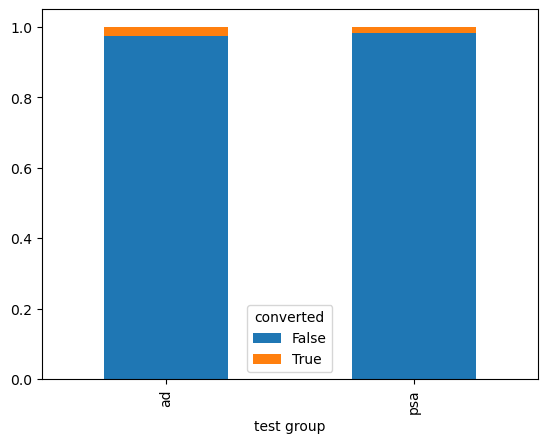

In [54]:
ct_conversion_test_group.plot.bar(stacked = True);

converted        False     True 
most ads day                    
Monday        0.967188  0.032812
Tuesday       0.970160  0.029840
Wednesday     0.975058  0.024942
Sunday        0.975524  0.024476
Friday        0.977788  0.022212
Thursday      0.978429  0.021571
Saturday      0.978949  0.021051


<Axes: xlabel='most ads day'>

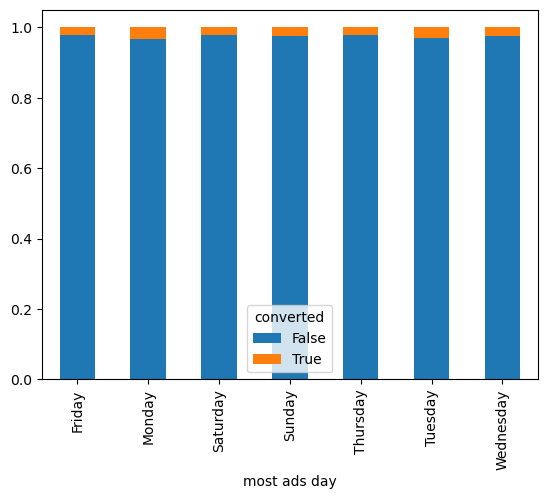

In [61]:
ct_conversion_day = pd.crosstab(df['most ads day'], df['converted'], normalize ='index')
print(ct_conversion_day.sort_values(by=True, ascending=False))
ct_conversion_day.plot.bar(stacked = True)

converted         False     True 
most ads hour                    
16             0.969228  0.030772
20             0.970197  0.029803
15             0.970347  0.029653
21             0.971077  0.028923
17             0.971790  0.028210
14             0.971937  0.028063
18             0.972620  0.027380
19             0.973280  0.026720
22             0.973895  0.026105
13             0.975323  0.024677
12             0.976172  0.023828
23             0.977338  0.022662
6              0.977756  0.022244
11             0.977884  0.022116
10             0.978479  0.021521
5              0.979085  0.020915
8              0.980484  0.019516
9              0.980809  0.019191
0              0.981575  0.018425
7              0.981889  0.018111
4              0.984765  0.015235
1              0.987089  0.012911
3              0.989548  0.010452
2              0.992687  0.007313


<Axes: xlabel='most ads hour'>

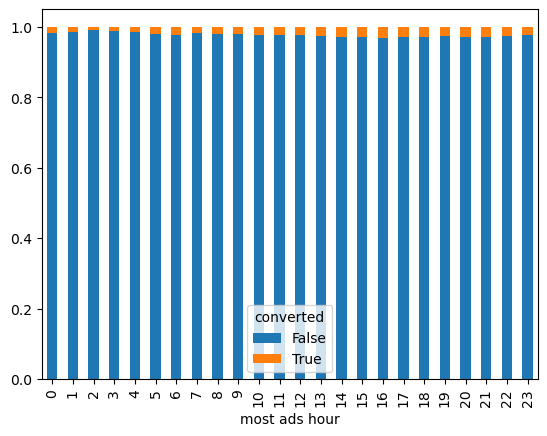

In [62]:
ct_conversion_hour = pd.crosstab(df['most ads hour'], df['converted'], normalize='index')
print(ct_conversion_hour.sort_values(by=True, ascending=False))
ct_conversion_hour.plot.bar(stacked= True)

<Axes: xlabel='converted', ylabel='total ads'>

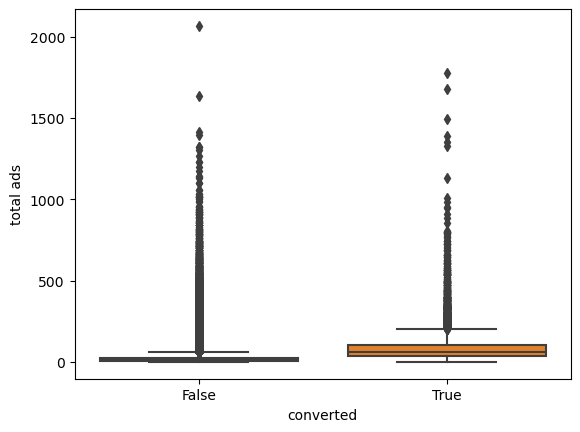

In [63]:
sns.boxplot(x ='converted', y='total ads', data=df)

<Axes: xlabel='converted', ylabel='total ads'>

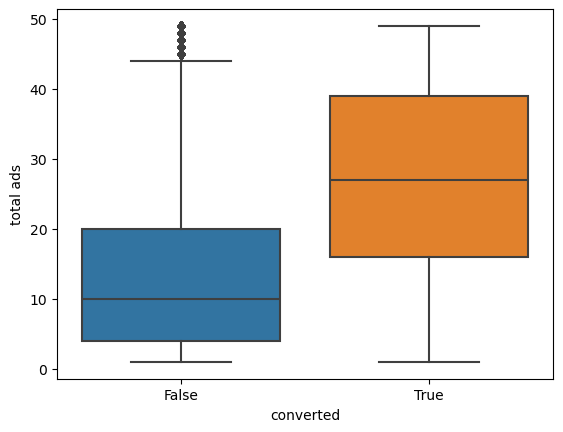

In [64]:
sns.boxplot(x='converted', y='total ads', data=df[df['total ads'] < 50])

 # Statistical Analysis

In [65]:
from scipy.stats import chi2_contingency
alpha = 0.05
for variable in df_cat.columns:
    if variable != 'converted':
        contingency_table = pd.crosstab(df_cat[variable], df_cat['converted'])

        # Perform Chi-squared Test
        chi2, p, _, _ = chi2_contingency(contingency_table)

        # Display the results
        print(f"\nChi-squared test for {variable} vs. converted:")
        print(f"Chi_squared value: {chi2}")
        print(f"p-value: {p}")

        # Check for SIgnificance
        if p < alpha:
            print(f"The difference in conversition rates across {variable} is statistically significant.")
        else:
            print(f"There is no significant difference in conversion rates across {variable}.")


Chi-squared test for test group vs. converted:
Chi_squared value: 54.005823883685245
p-value: 1.9989623063390075e-13
The difference in conversition rates across test group is statistically significant.

Chi-squared test for most ads day vs. converted:
Chi_squared value: 410.0478857936585
p-value: 1.932184379244731e-85
The difference in conversition rates across most ads day is statistically significant.

Chi-squared test for most ads hour vs. converted:
Chi_squared value: 430.76869230822086
p-value: 8.027629823696771e-77
The difference in conversition rates across most ads hour is statistically significant.


In [66]:
df_cat.columns

Index(['test group', 'converted', 'most ads day', 'most ads hour'], dtype='object')

In [71]:
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu

# Step 1: Check Assumptions
# Normality Assumption
shapiro_stat_true, shapiro_p_value_true = shapiro(df[df['converted'] == True]['total ads'])
shapiro_stat_false, shapiro_p_value_false = shapiro(df[df['converted'] == False]['total ads'])

print(f"Shapiro-Wilk test for normality (True group): p-value = {shapiro_p_value_true}")
print(f"Shapiro-Wilk test for normality (False group): p-value = {shapiro_p_value_false}")

# Equality for variences assumption
levene_stat, levene_p_value = levene(df[df['converted']]['total ads'], df[~df['converted']]['total ads'])
print(f"Levene's Test for equality of varience: p-value = {levene_p_value}")


Shapiro-Wilk test for normality (True group): p-value = 0.0
Shapiro-Wilk test for normality (False group): p-value = 0.0
Levene's Test for equality of varience: p-value = 0.0


In [ ]:
# Step 2: Perform a suitable test
alpha = 0.05
    if shapiro_p_value_true > alpha and shapiro_p_value_false > alpha and levene_p_value > alpha:
        t_stat, t_p_value = ttest_ind(df[df['converted']]['total ads'], df[~df['converted']]['total ads'])
        print(f"Independent Two-sample t-test:p-value = {t_p_value}")
    else:
        u_stat, u_p_value = mannwhitneyu(df[df['converted']]['total ads'], df[~df['converted']]['total ads'])
        print(f"Mann-Whitneyu U-test:p-value = {u_p_value}")

Mann-Whitneyu U-test:p-value = 0.0